In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [2]:
spark = SparkSession \
    .builder \
    .appName("Learning Spark") \
    .getOrCreate()

In [3]:
df = spark.read.json("jobs-20230613.jsonl")

In [4]:
df.printSchema()

root
 |-- crawler: string (nullable = true)
 |-- identifier: string (nullable = true)
 |-- jobposting: struct (nullable = true)
 |    |-- @context: string (nullable = true)
 |    |-- @type: string (nullable = true)
 |    |-- baseSalary: struct (nullable = true)
 |    |    |-- @context: string (nullable = true)
 |    |    |-- @type: string (nullable = true)
 |    |    |-- currency: string (nullable = true)
 |    |    |-- value: struct (nullable = true)
 |    |    |    |-- @context: string (nullable = true)
 |    |    |    |-- @type: string (nullable = true)
 |    |    |    |-- unitText: string (nullable = true)
 |    |    |    |-- value: string (nullable = true)
 |    |-- datePosted: string (nullable = true)
 |    |-- description: string (nullable = true)
 |    |-- directApply: boolean (nullable = true)
 |    |-- employmentType: string (nullable = true)
 |    |-- hiringOrganization: struct (nullable = true)
 |    |    |-- @context: string (nullable = true)
 |    |    |-- @type: string (

In [5]:
from pyspark.sql.functions import col
d3dates = df.withColumn("posted_at", col("jobposting.datePosted").cast("timestamp"))
d3dates.show()

+---------------+--------------------+--------------------+------------------+--------------------+-------+-------------------+
|        crawler|          identifier|          jobposting|search_engine_type|                 url|version|          posted_at|
+---------------+--------------------+--------------------+------------------+--------------------+-------+-------------------+
|CtCrawlerByCity|349CC382987FBDE86...|{https://schema.o...|               JDP|https://mx.comput...|  0.0.7|2023-06-10 00:00:00|
|CtCrawlerByCity|3BF1B7E269C71CBF6...|{https://schema.o...|               JDP|https://mx.comput...|  0.0.7|2023-04-26 00:00:00|
|CtCrawlerByCity|825193DDEB7D24B96...|{https://schema.o...|               JDP|https://mx.comput...|  0.0.7|2023-06-01 00:00:00|
|CtCrawlerByCity|C10A495FF38E4D296...|{https://schema.o...|               JDP|https://mx.comput...|  0.0.7|2023-05-31 00:00:00|
|CtCrawlerByCity|0DE8860AE506408A6...|{https://schema.o...|               JDP|https://mx.comput...|  0.0

In [6]:
posted_at = d3dates.withColumn("days_diff", pyspark.sql.functions.datediff(col("posted_at"), 
                                            pyspark.sql.functions.current_date())).groupBy("days_diff").count().sort("days_diff")
posted_at.show()

+---------+-----+
|days_diff|count|
+---------+-----+
|     -141|    4|
|     -124|  107|
|     -123|  151|
|     -122|  144|
|     -121|  159|
|     -120|  141|
|     -119|    2|
|     -117|  181|
|     -116|  240|
|     -115|  217|
|     -114|  110|
|     -113|  122|
|     -110|  252|
|     -109|  208|
|     -108|  181|
|     -107|  190|
|     -106|  121|
|     -103|  198|
|     -102|   57|
|     -101|  286|
+---------+-----+
only showing top 20 rows



<Axes: xlabel='days_diff'>

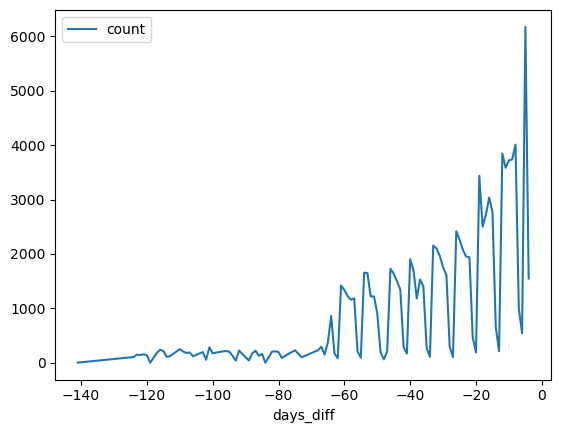

In [7]:
import matplotlib.pyplot as plt
posted_at.toPandas().plot(x="days_diff", y="count")

In [8]:
df.withColumn("a1", F.collect_set('crawler')).show()

AnalysisException: [MISSING_GROUP_BY] The query does not include a GROUP BY clause. Add GROUP BY or turn it into the window functions using OVER clauses.;
Aggregate [crawler#8, identifier#9, jobposting#10, search_engine_type#11, url#12, version#13, collect_set(crawler#8, 0, 0) AS a1#100]
+- Relation [crawler#8,identifier#9,jobposting#10,search_engine_type#11,url#12,version#13] json


In [ ]:
col("lit", F.lit(False))